In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_66311_I')

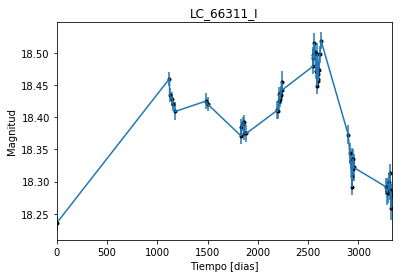

In [2]:
data = np.genfromtxt('LC_66311_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_66311_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

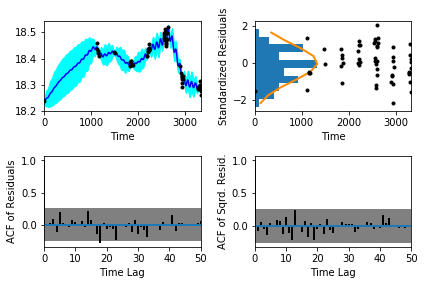

In [6]:
sample.assess_fit()

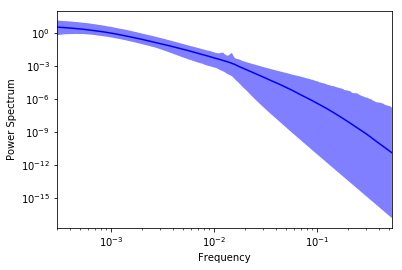

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_66311_I')

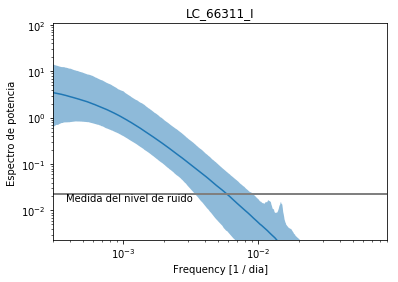

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_66311_I')

Text(0.5,1,'Prediccion , valor esperado LC_66311_I')

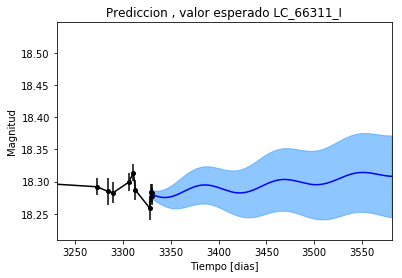

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_66311_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_66311_I')

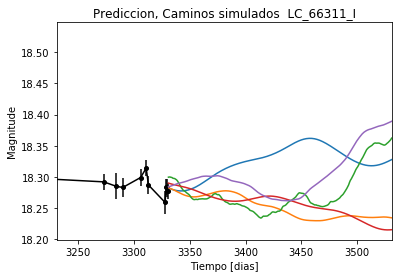

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_66311_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_66311_I')

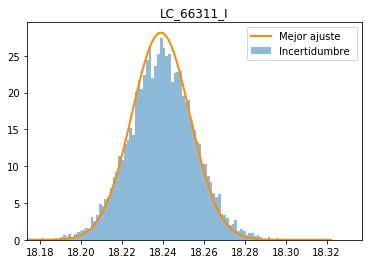

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_66311_I')

Text(0.5,1,'Interpolacion, camino simulado LC_66311_I')

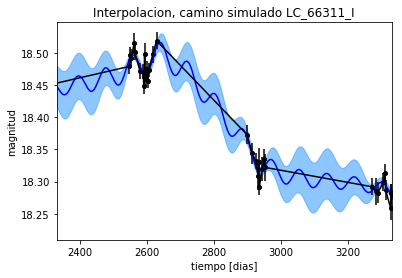

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66311_I')

Text(0.5,1,'Interpolacion, camino simulado LC_66311_I')

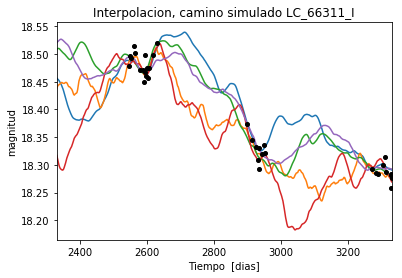

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66311_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 343.927319552
Median: 0.0214568269146
Standard deviation: 0.22448820722
68% credibility interval: [ 0.00092046  0.29812944]
95% credibility interval: [  3.47745805e-04   8.48989924e-01]
99% credibility interval: [  3.12846501e-04   9.95065280e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 596.597836342
Median: 0.00281977046942
Standard deviation: 0.0753763907604
68% credibility interval: [ 0.0004194   0.03267748]
95% credibility interval: [ 0.00031537  0.26079732]
99% credibility interval: [  3.04282381e-04   5.27300948e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 536.842209168
Median: 0.0264451525579
Standard d

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 405.966429208
Median: 163.474968388
Standard deviation: 1.99181904999
68% credibility interval: [ 161.38594409  164.89456393]
95% credibility interval: [ 158.62170796  166.92891745]
99% credibility interval: [ 156.34721339  167.99334155]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 464.015745795
Median: 1.06426143347
Standard deviation: 2.30799940482
68% credibility interval: [ 0.06166998  4.58748793]
95% credibility interval: [ 0.01470226  7.64183462]
99% credibility interval: [ 0.01073343  9.93872165]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 216.820174283
Median: 0.560143439523
Standard deviation: 7.9846802278
68% credibility interval: [ 0.01283345  7.64853883]
95% credibility interval: [  4.95776020e-03 

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 8049.11757476
Median: 7.43461815937e-14
Standard deviation: 1.32642795323e+77
68% credibility interval: [  2.32837565e-44   1.78255981e+00]
95% credibility interval: [  2.80395910e-113   5.32404411e+057]
99% credibility interval: [  1.97990486e-119   9.24182702e+062]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1360.20636131
Median: 18.3690550681
Standard deviation: 0.0436105861966
68% credibility interval: [ 18.32613976  18.40433002]
95% credibility interval: [ 18.2753556   18.44564357]
99% credibility interval: [ 18.22199253  18.48916262]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 461.23700886
Median: 0.00661730375343
Standard deviation: 0.224384938627
68% credibility interval: [ 0.          0.23974913]
95% credibility interval: [ 0.          0.84596175]
99% credibility interval: [ 0.          0.99184011]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 461.23700886
Median: 0.00661730375343
Standard deviation: 0.224384938627
68% credibility interval: [ 0.          0.23974913]
95% credibility interval: [ 0.          0.84596175]
99% credibility interval: [ 0.          0.99184011]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 554.344455747
Median: 0.0
Standard deviation: 0.000254690341953
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 405.966429208
Median: 163.474968388
Standard deviation: 1.99181904999
68% credibility interval: [ 161.38594409  164.89456393]
95% credibility interval: [ 158.62170796  166.92891745]
99% credibility interval: [ 156.34721339  167.99334155]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 874.072645471
Median: 0.00746446718142
Standard deviation: 0.00767645186644
68% credibility interval: [ 0.00460614  0.01325551]
95% credibility interval: [ 0.00311638  0.02586663]
99% credibility interval: [ 0.0025209   0.05440288]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1008.36673722
Median: 0.909839281267
Standard deviation: 0.150298508332
68% credibility interval: [ 0.7774276   1.06993892]
95% credibility interval: [ 0.67880768  1.25095024]
99% credibility interval: [ 0.62414169  1.40419045]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 5132.31427117
Median: 0.000191837581438
Standard deviation: 0.0255344438291
68% credibility interval: [  6.15942767e-07   4.02969833e-03]
95% credibility interval: [  1.32657554e-62   2.89619163e-02]
99% credibility interval: [  4.65946674e-67   1.00814707e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 343.927319552
Median: (-0.134817219609-0.936793869906j)
Standard deviation: 1.99429089386
68% credibility interval: [-1.87320250+0.j         -0.00578342-0.94900844j]
95% credibility interval: [ -5.33436101e+00+0.j          -2.18495133e-03-0.07498575j]
99% credibility interval: [ -6.25217955e+00+0.j          -1.96567254e-03-0.09408227j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 596.597836342
Median: (-0.0177171403831+0.0711726097185j)
Standard deviation: 1.48727390625
68% credibility interval: [-0.20531869+0.97750411j -0.00263516+0.00283682j]
95% credibility interval: [-1.63863790+4.1382518j -0.00198154+0.j       ]
99% credibility interval: [ -3.31312957e+00+2.17996515j  -1.91186258e-03+0.j        ]
Posterior summ